In [96]:
import xarray as xr
import salem

In [2]:
import sys
sys.path.append("/home/abhi/Documents/mygit/postBC_diagnostic/src/scripts")
from recipes import *

In [4]:
sys.path.append('../scripts/')
from helper_funcs import get_model_year_combined_file

In [6]:
model = 'EnsMean_ALL21'
variable = 'pr'
scen = 'historical'

In [8]:
f = get_model_year_combined_file(model, variable, scen)
ds = xr.open_dataset(f, chunks={'time': 365})

In [24]:
ds_yseasmean = yseasmean(ds)

In [26]:
%%time
ds_yseasmean = ds_yseasmean.compute()

CPU times: user 6.38 s, sys: 3.93 s, total: 10.3 s
Wall time: 1min


In [28]:
ds_yseasmean = ds_yseasmean.compute()

In [29]:
ds_yseasmean

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 200, seas: 4)
Coordinates:
  * lon      (lon) float32 60.125 60.375 60.625 ... 109.375 109.625 109.875
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 39.375 39.625 39.875
  * seas     (seas) object 'DJF' 'JJAS' 'MAM' 'ON'
Data variables:
    pr       (seas, lat, lon) float32 2.6417139 2.6427522 ... 0.23565532

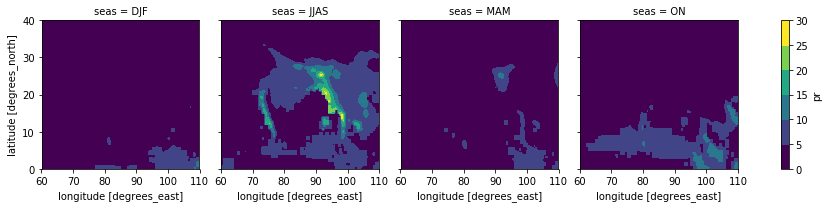

In [30]:
ds_yseasmean.pr.plot.contourf(x='lon', y='lat', col='seas')

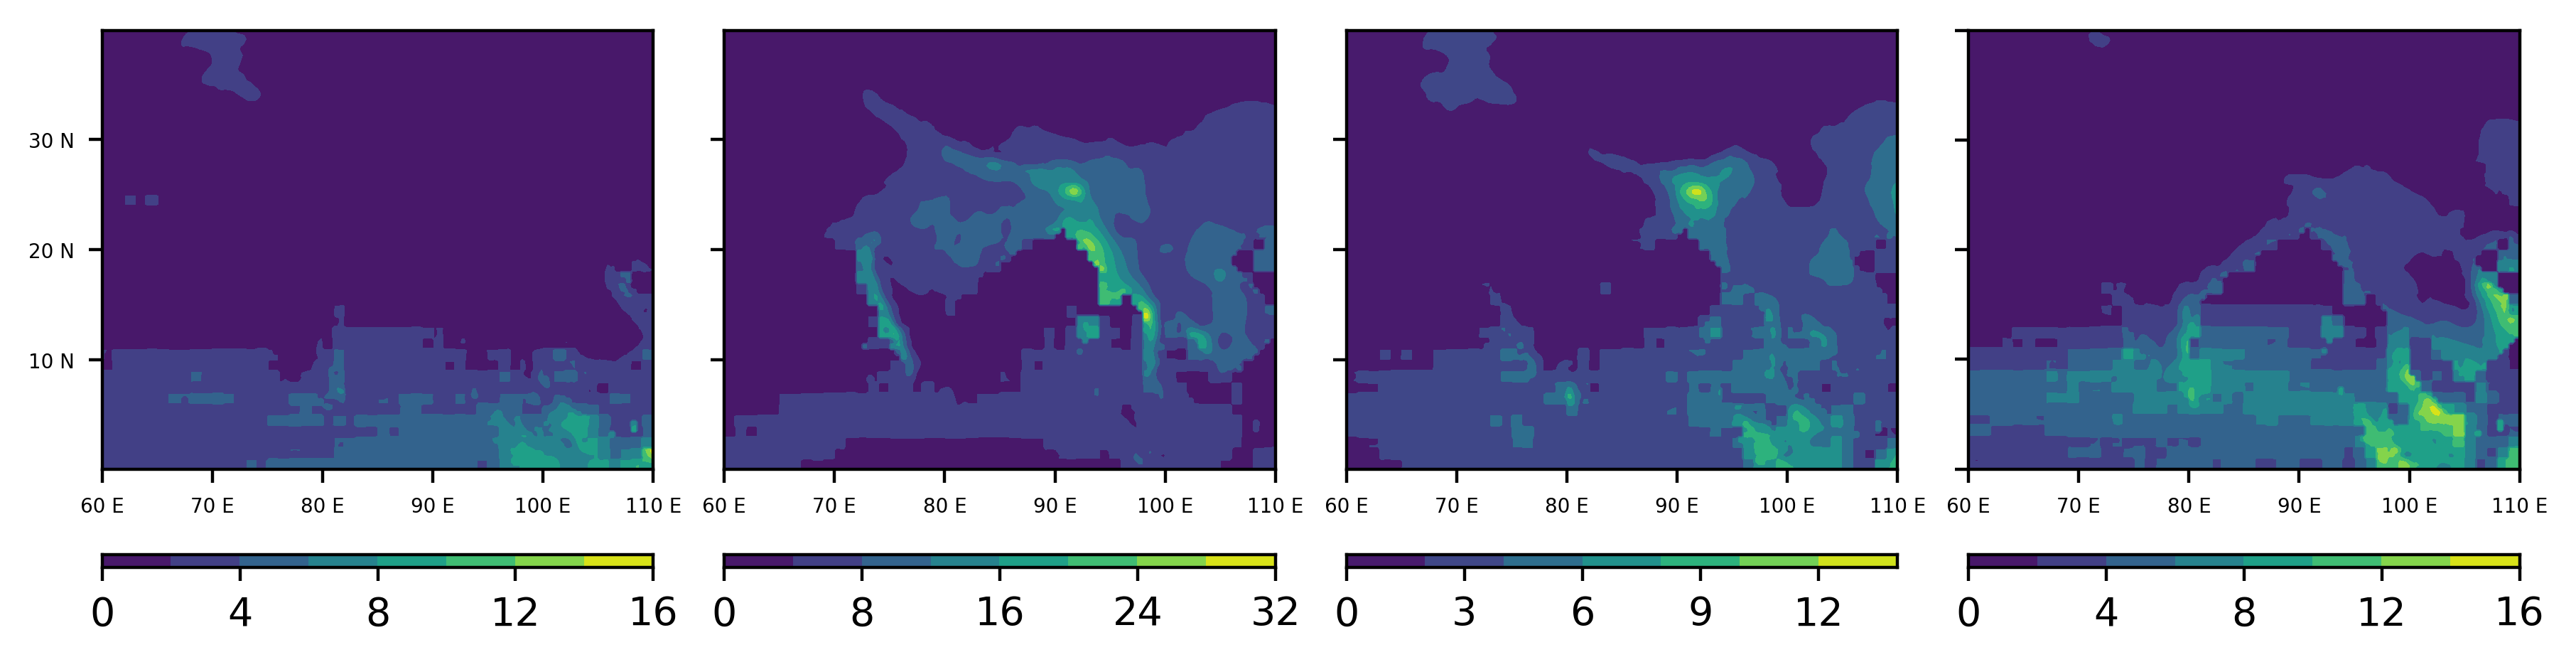

In [138]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,2.5), dpi=400)
grid = ImageGrid(fig, 111, (1,4),
                 axes_pad=.25,
                 cbar_location='bottom',
                 cbar_mode='each',
                 cbar_pad=0.3,
                 aspect=True,
                 cbar_size='3%')

lon = ds_yseasmean.lon
lat = ds_yseasmean.lat
X, Y = np.meshgrid(lon, lat)

xticks = range(60, 120, 10)
xticklabs = [f'{s} E' for s in xticks]

yticks = range(0, 50, 10)
yticklabs = [f'{s} N' for s in yticks]



for (lab,data), ax, cax in zip(ds_yseasmean.groupby('seas'), grid, grid.cbar_axes):
    im = ax.contourf(X, Y, data[variable])
    cax.colorbar(im)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabs, fontsize=5)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabs, fontsize=5)


In [122]:
import geopandas as gpd

In [139]:
shp = gpd.read_file('/home/abhi/Documents/data/shapefiles/India_SHP/INDIA.shp')
crs_str = shp.geometry.crs

In [124]:
shp = gpd.read_file('/home/abhi/Documents/data/shapefiles/AMARAVATI -AOI/Capital_City.shp')


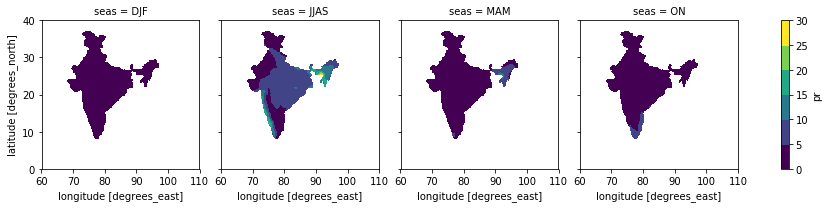

In [142]:
ds_yseasmean.salem.roi(shape=shp).pr.plot.contourf(col='seas')

In [133]:
shp = shp.to_crs(crs_str)

In [145]:
shp

,ST_NAME,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"(POLYGON ((92.898888 12.915831, 92.89917 12.91..."
1,Andhra Pradesh,"POLYGON ((83.943192 18.214308, 83.942359999999..."
2,Arunachal Pradesh,"POLYGON ((94.86086299999999 27.739479, 94.8660..."
3,Assam,"POLYGON ((95.59916699999999 27.22961, 95.59008..."
4,Bihar,"POLYGON ((87.955612 25.53805, 87.952393 25.536..."
5,CHANDIGARH,"POLYGON ((76.692673 30.744713, 76.690681 30.74..."
6,Chhattisgarh,"POLYGON ((83.797989 22.289963, 83.797516 22.28..."
7,DADRA AND NAGAR HAVELI,"POLYGON ((72.985321 20.113451, 72.97963 20.125..."
8,DAMAN AND DIU,"(POLYGON ((70.962082 20.72208, 70.96347 20.721..."
9,Goa,"POLYGON ((74.26171100000001 14.990761, 74.2632..."
